```Time series and its importance```
1. Time-Series(TS) is a sequence of measurements on the same variable collected over
time.
1. It is a set of observations, each one being recorded at equally spaced time interval.
1. We extrapolate a past trend to predict future such as movement of short-term interest rate, capacity demand in airline and other sectors.

```Multivariate-time series analysis and prediction using incomplete data```
1. TS data is collected for multiple variables over the same period of time. For example, a country's unemployment, GDP and inflation data over an interval period.
1. The TS data measures the changes over time. The time column in the data structure is used to sort the data.
1. TS analsis has played major role in areas like fraud detection, spam email filtering, finance, weather, healthcare, space exploration, manufactoring et al.

```How to predict future using TS?```
1. Simple deterministic model such as linear extrapolation
2. Complex deep learning approaches

```TS data intervals```

The interval depends on the nature of forecasting. For example, for a nation's GDP, we use yearly interval while sales data can be monthly and air-quality index being monitored on hourly basis.

```Challenges with time-series analysis```
1. Data is not independent.
1. Data order is important to keep the data structure intact
1. Order is also important as data is list of observations

```Analysis of TS data and handling missing data```

Since all data need to be contiguous, we need to impute the missing data.
Plotting a TS data, captures inherent features such as patterns, time dependent changes in data, relationship between variables et al.
We get to know trend and seasonality of a TS data which are also known as systematic component of a TS data.
There are some irregular components as well which are termed as white noise or error or random components.

Forecasting of systematic components involves estimation and extrapolation techniques.
White noises are assumed to have a normal distribution with constant variance and 0 mean.

```Trend and Seasonality```

Trend is a long term movement of a series. It can be constant, ascending or descending.
Seasonality on the other hand is about repeatable pattern over a time-interval such as temperature recorded over months, rain over months, demand for a consumer good, air travel demand and so on. 
For example, electricity consumption is high during the day and low during night, or online sales increase during Christmas before slowing down again.
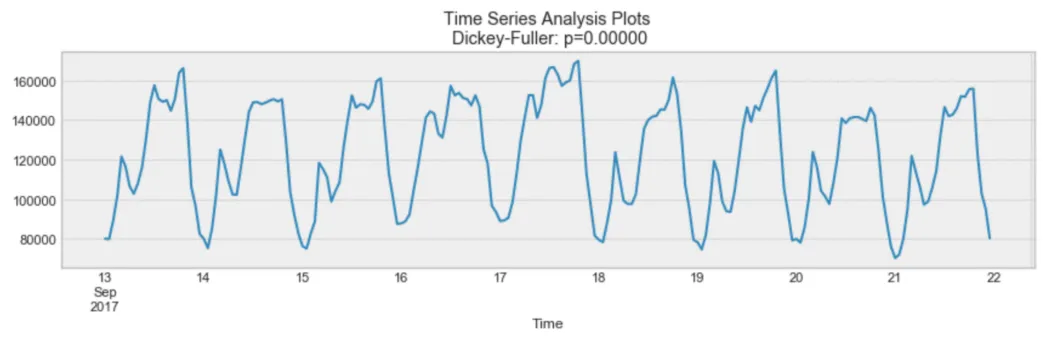
Kindly note that we need to have seasonality with time interval less than a year as an annual series does not have seasonality by definition.

```Stationarity```

Stationarity is an important characteristic of time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has constant mean and variance, and covariance is independent of time.
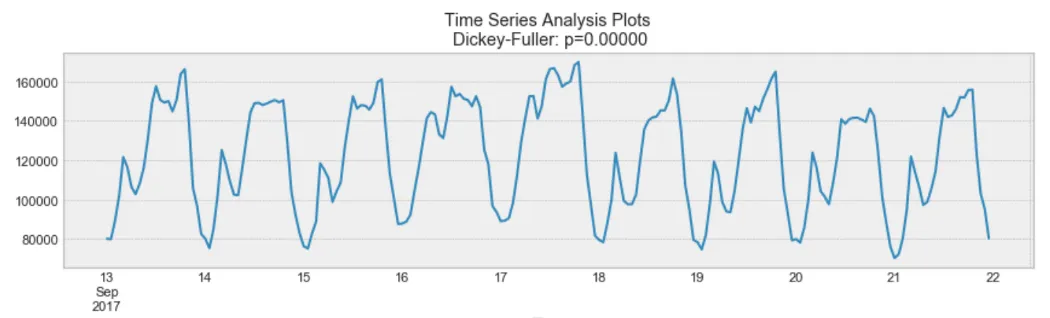
Looking again at the above plot, we see that the process above is stationary. The mean and variance do not vary over time.

```Autocorrelation```

It is similarity between observations as a function of the time lag between them.
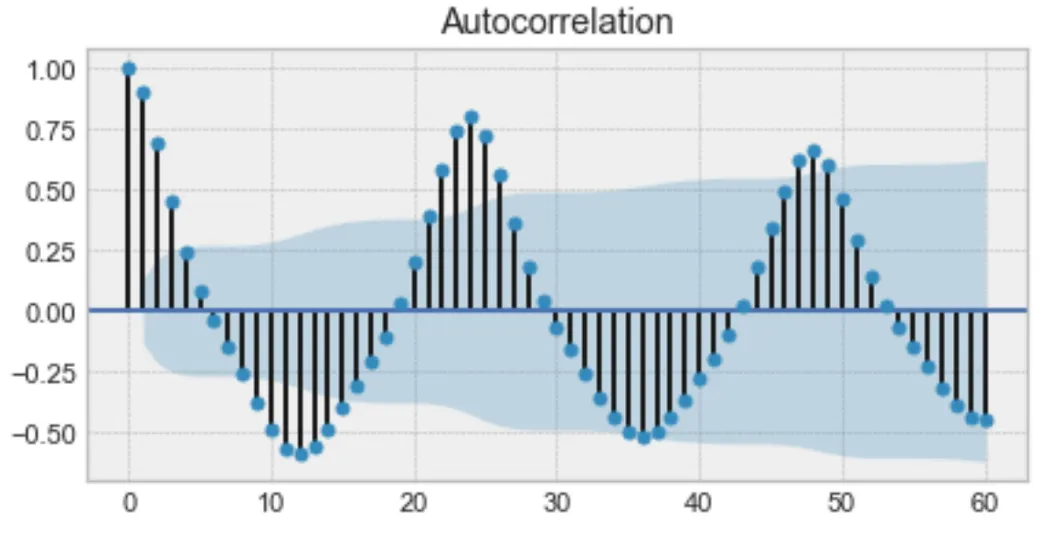
Above is an example of an autocorrelation plot. Looking closely, you realize that the first value and the 24th value have a high autocorrelation. Similarly, the 12th and 36th observations are highly correlated. This means that we will find a very similar value at every 24 unit of time.

Notice how the plot looks like sinusoidal function. This is a hint for seasonality, and you can find its value by finding the period in the plot above, which would give 24h.

In [ ]:
%pip install pandas numpy matplotlib statsmodels

```Modelling TS```

```Moving Average Model```

The moving average model is probably the most naive approach to time series modelling. This model simply states that the next observation is the mean of all past observations.

Although simple, this model might be surprisingly good and it represents a good starting point.

Otherwise, the moving average can be used to identify interesting trends in the data. We can define a window to apply the moving average model to smooth the time series, and highlight different trends.

In [23]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Generate some random data
np.random.seed(123)
data = np.random.normal(size=100)

# Fit a simple MA(1) model
model = ARIMA(data, order=(0, 0, 1)).fit()

# Print the model summary
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -153.957
Date:                Sun, 30 Apr 2023   AIC                            313.915
Time:                        17:34:58   BIC                            321.730
Sample:                             0   HQIC                           317.078
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0270      0.114      0.237      0.812      -0.196       0.250
ma.L1          0.0072      0.098      0.073      0.942      -0.185       0.199
sigma2         1.2729      0.219      5.813      0.0

This is a summary of a fitted Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors (SARIMAX) model. 

The model has one exogenous variable 'y' and 100 observations. The order of the model is (0, 0, 1), meaning it's an ARIMA model with zero autoregressive terms, zero integrated terms, and one moving average term. The model is fitted using maximum likelihood estimation method. 

The model summary shows the estimates of the coefficients for the intercept (`const`) and the moving average term (`ma.L1`). The standard errors, z-scores, and p-values are also provided. The coefficient of the intercept is not significant at the 5% level since the p-value is greater than 0.05. Similarly, the coefficient of the moving average term is not significant at the 5% level. 

The estimated value of the residual variance is shown as `sigma2`. The Ljung-Box test (`Q`) shows that there is no significant autocorrelation in the residuals. The Jarque-Bera test (`JB`) tests the normality assumption of the residuals and shows that the residuals are normally distributed since the p-value is greater than 0.05. 

Finally, the Heteroskedasticity test (`H`) shows that there is no evidence of significant heteroskedasticity in the residuals since the p-value is greater than 0.05.


```Auto-Regressive Model```
An autoregressive (AR) model is a type of statistical model that is commonly used in time series analysis to describe the relationship between past and current values in a sequence of observations. In an autoregressive model, the current value of the variable is modeled as a linear combination of its past values, along with a random error term.

In other words, an autoregressive model predicts the future values of a time series based on its own past values. The "auto" in "autoregressive" refers to the fact that the model uses the series itself as the predictor variable.

The order of an autoregressive model (denoted as AR(p)) refers to the number of past values used in the model. For example, an AR(1) model uses only the most recent past value, while an AR(2) model uses the two most recent past values. The higher the order of the model, the more complex the relationship between past and current values becomes.

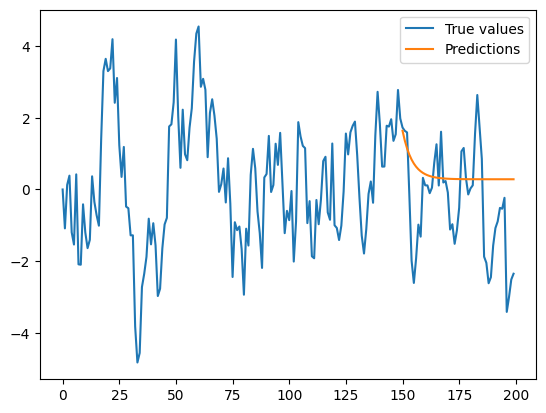

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Generate a time series with autocorrelation
np.random.seed(123)
n_samples = 200
y = np.zeros(n_samples)
for t in range(1, n_samples):
    y[t] = 0.8 * y[t-1] + np.random.normal()

# Split the time series into training and test sets
train_size = 150
train, test = y[:train_size], y[train_size:]

# Fit an autoregressive model with order 1 (AR(1))
model = AutoReg(train, lags=1)
results = model.fit()

# Predict the test set using the fitted model
predictions = results.predict(start=train_size, end=n_samples-1)

# Plot the time series and predictions
plt.plot(y, label='True values')
plt.plot(np.arange(train_size, n_samples), predictions, label='Predictions')
plt.legend()
plt.show()


```Mixed Autoregressive-Moving Average (ARMA)```

Mixed Autoregressive-Moving Average (ARMA) is a type of statistical model used to describe time series data. It combines both autoregressive (AR) and moving average (MA) models to capture both the autocorrelation and the moving average effects present in the time series. 

An ARMA(p,q) model consists of two parts:
- An AR(p) component, which models the relationship between the current observation and the p previous observations of the series, weighted by the model coefficients. 
- An MA(q) component, which models the relationship between the current observation and the q previous error terms (residuals), weighted by the model coefficients.

The "mixed" part of the ARMA model refers to the fact that it uses both autoregressive and moving average terms. 

The order of an ARMA(p,q) model is denoted by p and q, where p is the order of the autoregressive part and q is the order of the moving average part. The values of p and q are typically determined by analyzing the autocorrelation and partial autocorrelation plots of the time series.

ARMA models are commonly used in time series analysis and forecasting, and are often extended to incorporate other features, such as seasonal patterns or trends, to create more complex models like ARIMA (Autoregressive Integrated Moving Average) or SARIMA (Seasonal Autoregressive Integrated Moving Average) models.

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(2)   Log Likelihood               -1416.469
Method:               Conditional MLE   S.D. of innovations              1.000
Date:                Sun, 30 Apr 2023   AIC                           2840.938
Time:                        17:38:51   BIC                           2860.561
Sample:                             2   HQIC                          2848.397
                                 1000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0388      0.032     -1.222      0.222      -0.101       0.023
y.L1           0.0256      0.032      0.810      0.418      -0.036       0.088
y.L2          -0.0042      0.032     -0.133      0.8

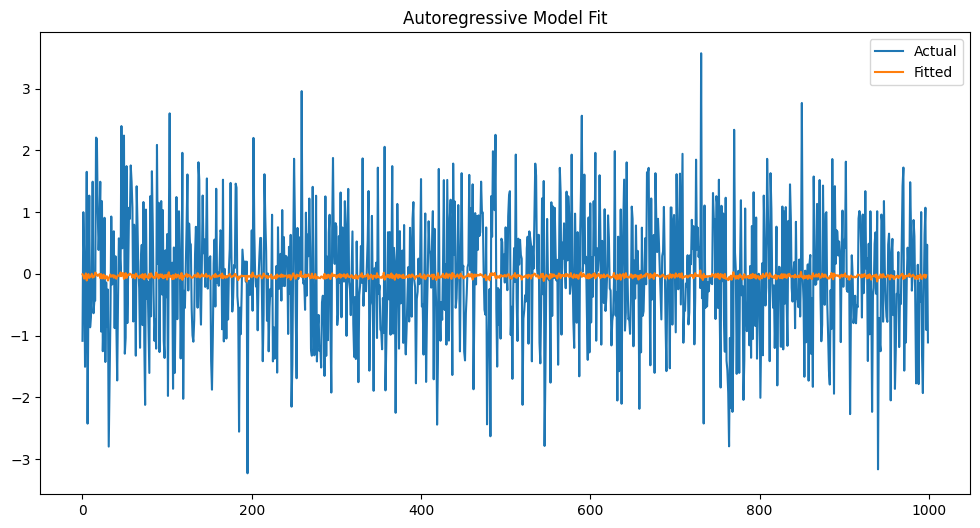

In [24]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(123)
data = np.random.normal(size=1000)

# Fit autoregressive model
model = sm.tsa.AutoReg(data, lags=2, old_names=False)
result = model.fit()

# Print model summary
print(result.summary())

# Plot the data and fitted values
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual')
plt.plot(result.fittedvalues, label='Fitted')
plt.title('Autoregressive Model Fit')
plt.legend()
plt.show()



The above summary provides the results of fitting an autoregressive (AR) model to a time series data using the `AutoReg` class in `statsmodels`.

Here's what each of the columns in the summary mean:

- `Dep. Variable`: The name of the dependent variable in the model, which in this case is `y`.
- `No. Observations`: The number of observations in the time series data.
- `Model`: The type of model used, which in this case is an `AutoReg` model with a lag of 2.
- `Method`: The method used to estimate the model parameters, which in this case is the conditional maximum likelihood estimation (MLE).
- `S.D. of innovations`: The standard deviation of the error term in the model.
- `Log Likelihood`: The log-likelihood of the fitted model, which is a measure of how well the model fits the data.
- `AIC`: The Akaike information criterion (AIC) of the fitted model, which is a measure of the model's goodness-of-fit that penalizes for the number of parameters in the model. Lower AIC values indicate better models.
- `BIC`: The Bayesian information criterion (BIC) of the fitted model, which is another measure of the model's goodness-of-fit that penalizes for the number of parameters in the model. Lower BIC values indicate better models.
- `HQIC`: The Hannan-Quinn information criterion (HQIC) of the fitted model, which is another measure of the model's goodness-of-fit that takes into account the sample size and the number of parameters in the model. Lower HQIC values indicate better models.
- `coef`: The estimated coefficients of the model, which represent the strength and sign of the relationship between the dependent variable and its lagged values. In this case, there are three coefficients: the intercept (`const`), and the lag coefficients (`y.L1` and `y.L2`).
- `std err`: The standard errors of the estimated coefficients, which measure the precision of the estimates.
- `z`: The z-statistics of the estimated coefficients, which measure the significance of the coefficients in the model.
- `P>|z|`: The p-values of the z-statistics, which indicate the level of statistical significance of the coefficients. A p-value less than 0.05 suggests that the coefficient is statistically significant.
- `[0.025      0.975]`: The 95% confidence intervals of the estimated coefficients, which provide a range of plausible values for the true population parameter.
- `Roots`: The roots of the autoregressive polynomial, which are the values of the lag coefficients that make the characteristic equation of the model equal to zero. The real and imaginary parts of the roots can provide insights into the stability and complexity of the model.